In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

c:\Users\damem\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
dataset, dataset_info = tfds.load('malaria', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

In [1]:
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

In [2]:
def splits(dataset, train_ratio, val_ratio, test_ratio):
  dataset_size = len(dataset)
  train_dataset = dataset.take(int(dataset_size*train_ratio))
  val_test_dataset = dataset.skip(int(train_ratio*dataset_size))
  val_dataset = val_test_dataset.take(int(val_ratio*dataset_size))
  test_dataset = val_test_dataset.skip(int(val_ratio*dataset_size))

  return train_dataset, val_dataset, test_dataset

In [12]:
test_dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)

In [8]:
print(list(train_dataset.as_numpy_iterator()))
print(list(val_dataset.as_numpy_iterator()))
print(list(test_dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5]
[6, 7]
[8, 9]


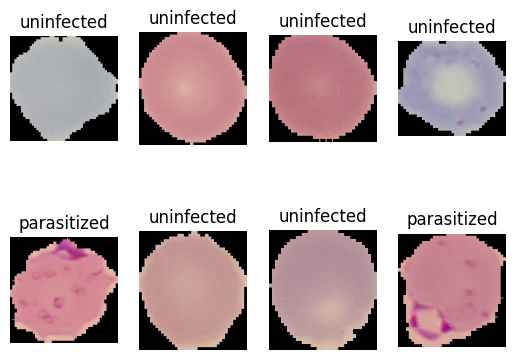

In [13]:
for index, (image, label) in enumerate(train_dataset.take(8)):
  ax = plt.subplot(2,4, index+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')